Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [15]:
import pandas as pd


products = pd.read_csv('foodmart.products.tsv', delimiter='\t')
sales = pd.read_csv('foodmart.sales.tsv', delimiter='\t')

full_table = pd.merge(products, sales, on='product_id', how='left')
full_table


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.4,7.0,1997-01-03,4.0
1,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.4,13.0,1997-01-11,3.0
2,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.4,17.0,1997-02-17,3.0
3,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.4,24.0,1997-03-15,3.0
4,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.4,7.0,1997-04-07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83387,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8,6.0,1997-12-01,2.0
83388,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8,16.0,1997-12-05,4.0
83389,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8,7.0,1997-12-19,2.0
83390,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8,13.0,1997-12-28,7.0


In [16]:
sparse_sales = pd.pivot_table(full_table, values='sales', index=['date', 'store_id'], columns=['product_id'], fill_value=0)
sparse_sales


product_id           1     2     3     4     5     6     7     8     9     \
date       store_id                                                         
1997-01-01 6.0        0.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   0.0   
           14.0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-01-02 11.0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           23.0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-01-03 7.0        4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1997-12-28 13.0       0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   
           22.0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-12-29 6.0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           7.0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   
1997-12-30 14.0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

product_id           10    ...  1550  1551  1552  1553  1554  1555  1556  \
date       store_id        ...                                             
1997-01-01 6.0        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           14.0       0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-01-02 11.0       0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           23.0       0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-01-03 7.0        0.0  ...   3.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
1997-12-28 13.0       4.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
           22.0       1.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-12-29 6.0        0.0  ...   4.0   0.0   0.0   0.0   0.0   0.0   0.0   
           7.0        0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1997-12-30 14.0       0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

product_id           1557  1558  1559  
date       store_id                    
1997-01-01 6.0        0.0   0.0   0.0  
           14.0       0.0   0.0   0.0  
1997-01-02 11.0       0.0   0.0   0.0  
           23.0       0.0   0.0   0.0  
1997-01-03 7.0        0.0   0.0   3.0  
...                   ...   ...   ...  
1997-12-28 13.0       0.0   0.0   7.0  
           22.0       0.0   0.0   0.0  
1997-12-29 6.0        0.0   0.0   0.0  
           7.0        0.0   0.0   0.0  
1997-12-30 14.0       0.0   0.0   0.0  

[780 rows x 1559 columns]

In [10]:
# Spearman

from scipy.stats import spearmanr

prod_ind_1_s, prod_ind_2_s = 10, 100
x_s = sparse_sales.iloc[:, prod_ind_1_s]
y_s = sparse_sales.iloc[:, prod_ind_2_s]

spearmanr(x_s, y_s).statistic

np.float64(0.03721526587380376)

In [11]:
# Pearson

from scipy.stats import pearsonr

prod_ind_1_p, prod_ind_2_p = 20, 100
x_p = sparse_sales.iloc[:, prod_ind_1_p]
y_p = sparse_sales.iloc[:, prod_ind_2_p]

pearsonr(x_p, y_p).statistic


np.float64(0.00963347646272301)

In [22]:
hot_index = 1001 # American Chicken Hot Dog

hot_column = sparse_sales[hot_index]
spearman_max, spearman_max_ind = 0, 0
pearson_max, pearson_max_ind = 0, 0

for i in sparse_sales.columns:
    if i == hot_index:
        continue
    col = sparse_sales[i]
    
    new_spearman = spearmanr(hot_column, col).statistic
    new_pearson = pearsonr(hot_column, col).statistic
    
    if new_spearman > spearman_max:
        spearman_max, spearman_max_ind = new_spearman, i
        
    if new_pearson > pearson_max:
        pearson_max, pearson_max_ind = new_pearson, i
    
print("Spearman's correlation coefficient:", spearman_max, spearman_max_ind)
print("Pearson's correlation coefficient:", pearson_max, pearson_max_ind)

Spearman's correlation coefficient: 0.19810529507897637 278
Pearson's correlation coefficient: 0.24026934048270562 1107


<Axes: xlabel='1001', ylabel='278'>

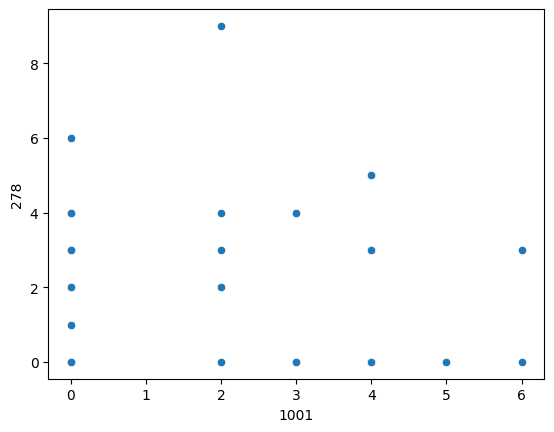

In [39]:
from seaborn import scatterplot, lineplot

# Spearman max
scatterplot(sparse_sales, x=hot_index, y=spearman_max_ind)

<Axes: xlabel='1001', ylabel='1107'>

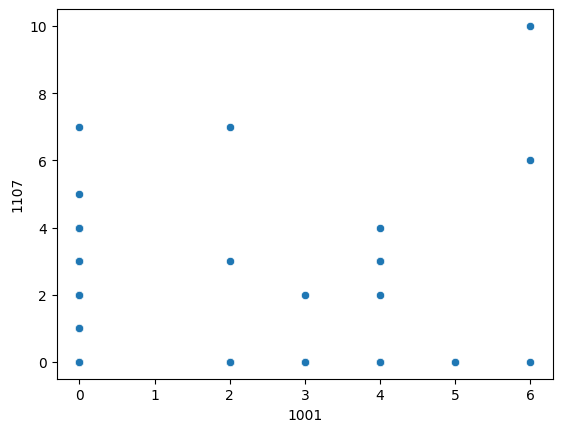

In [36]:
# Pearson max
scatterplot(sparse_sales, x=hot_index, y=pearson_max_ind)


<Axes: xlabel='date', ylabel='1001'>

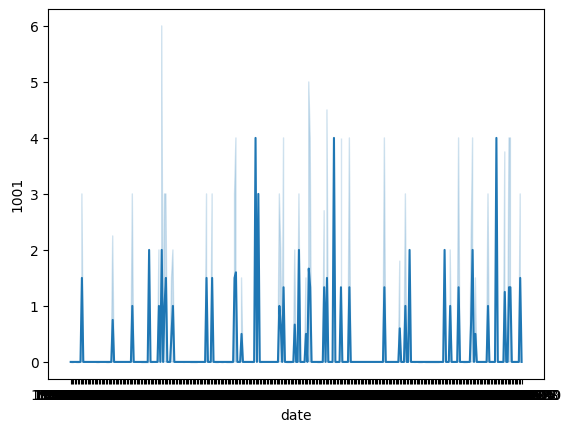

In [40]:
# American Chicken Hot Dogs
lineplot(sparse_sales, x="date", y=hot_index)

<Axes: xlabel='date', ylabel='278'>

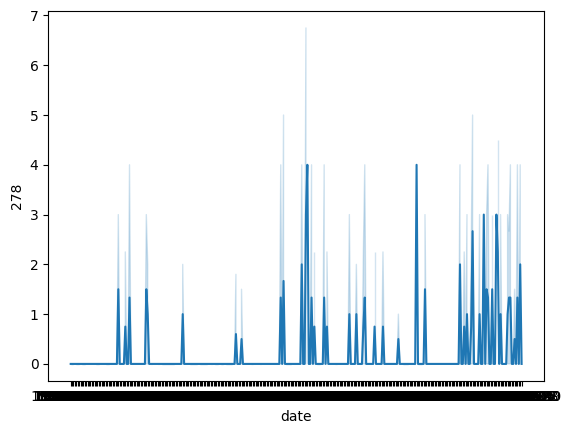

In [41]:
# Spearman max
lineplot(sparse_sales, x="date", y=spearman_max_ind)

<Axes: xlabel='date', ylabel='1107'>

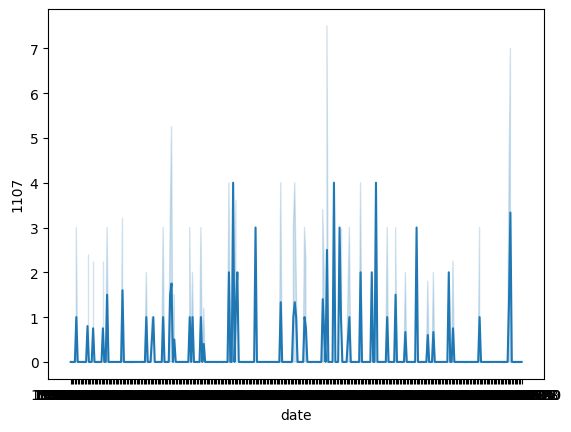

In [42]:
# Pearson max
lineplot(sparse_sales, x="date", y=pearson_max_ind)


In [43]:
from sklearn.metrics import matthews_corrcoef


mat_corr = matthews_corrcoef(full_table['recyclable_package'], full_table['low_fat'])
mat_corr

np.float64(-0.022382102874594415)

<Axes: xlabel='recyclable_package', ylabel='Count'>

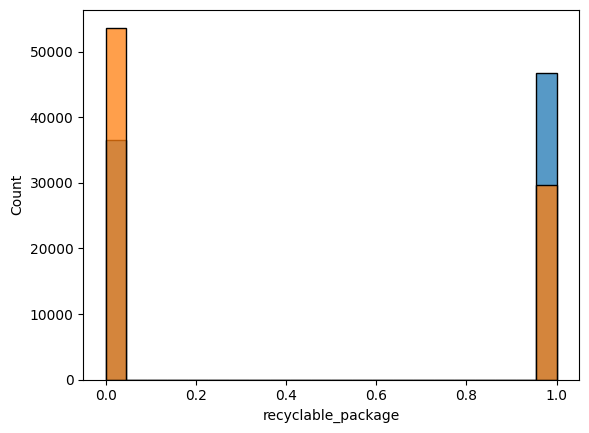

In [45]:
from seaborn import histplot


histplot(full_table, x='recyclable_package')
histplot(full_table, x='low_fat')

In [50]:
from scipy.stats.contingency import association, chi2_contingency

crosstab = pd.crosstab(full_table['store_id'], full_table['brand_name'])
cramer = association(crosstab)
chi2, p_val, dof, expected = chi2_contingency(crosstab)
cramer, p_val


(0.0343024046787291, np.float64(0.997931698271997))

Если взять alpha равным 0.05, то получим, что связь между переменными отсутствует, тк p_value > alpha

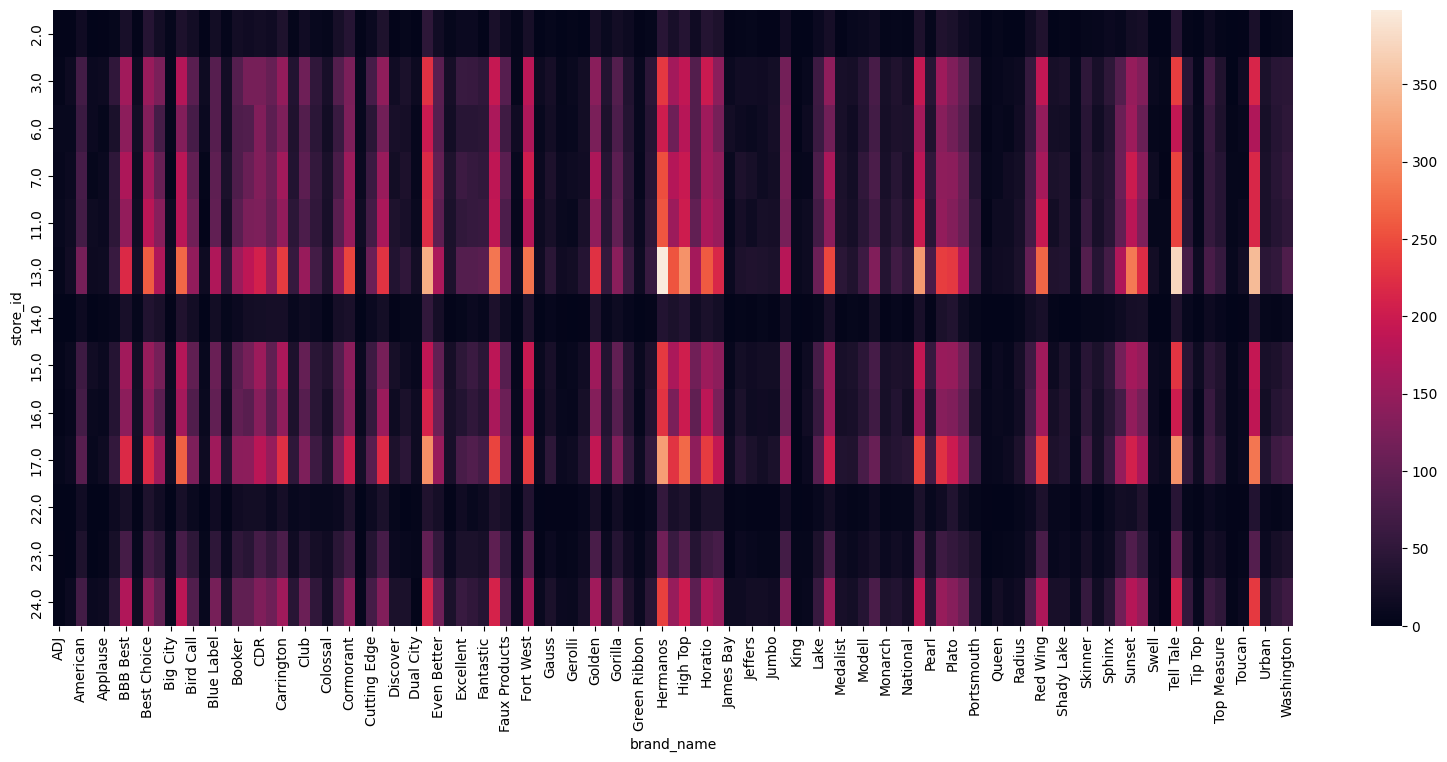

In [58]:
from matplotlib import pyplot as plt
from seaborn import heatmap

plt.figure(figsize=(20, 8))
heatmap(crosstab)
plt.show()